## Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



df = pd.read_csv('Documents/housingData.csv', names=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


- CRIM: Tasa de criminalidad per cápita por pueblo
- ZN: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
- INDUS: Proporción de acres de negocios no minoristas por pueblo
- CHAS: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo en Boston
- RAD: Índice de accesibilidad a carreteras radiales
- TAX: Tasa de impuestos a la propiedad de valor total por 10,000 ``$``
- PTRATIO: Relación alumno-maestro por pueblo
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de población negra por pueblo
- LSTAT: ``%`` de estatus más bajo de la población
- MEDV: Valor mediano de viviendas ocupadas por el propietario en miles de dólares ($1000)

Exploracion del df para comprobar anomalias o datos faltantes.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

No hay valores nulos ni duplicados.

<Axes: >

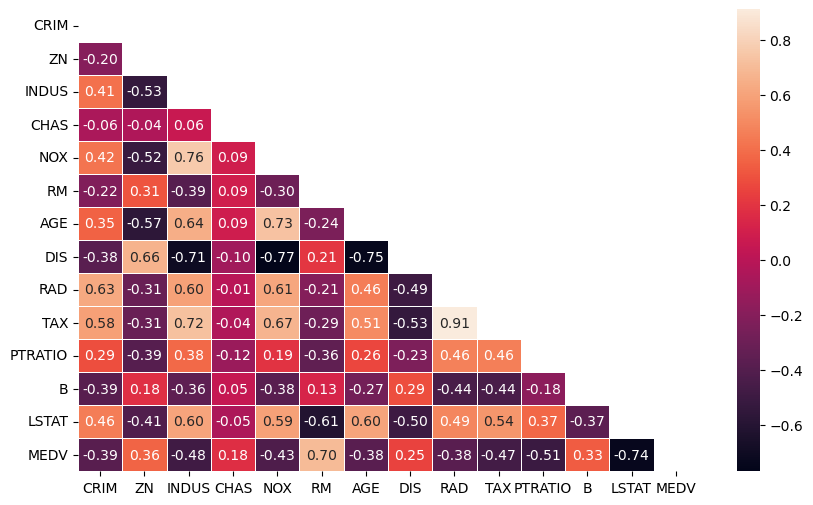

In [33]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5, mask=mask)

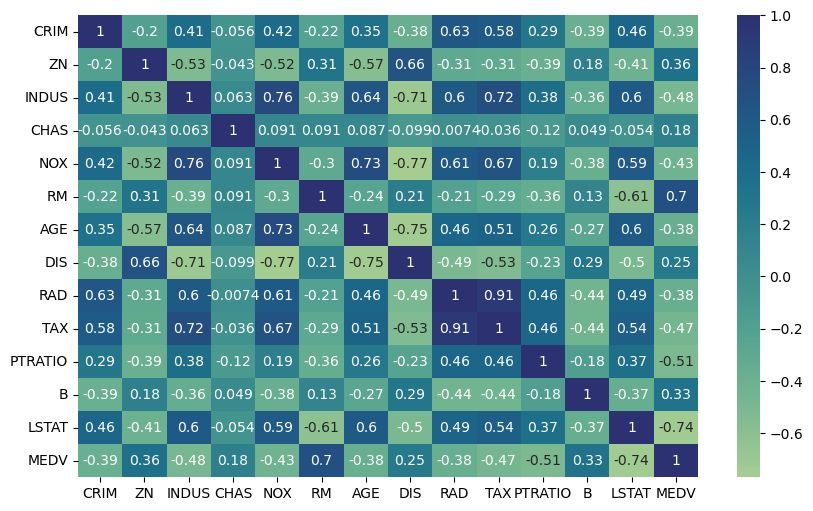

In [37]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="crest")
plt.show()

### Dummies

In [9]:
df_copy = df.drop('RAD', axis=1)
df_dummies = pd.get_dummies(df["RAD"], prefix="RAD", dtype= int)
df_dummies


,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
501,1,0,0,0,0,0,0,0,0
502,1,0,0,0,0,0,0,0,0
503,1,0,0,0,0,0,0,0,0
504,1,0,0,0,0,0,0,0,0


### Estandarización

<Axes: >

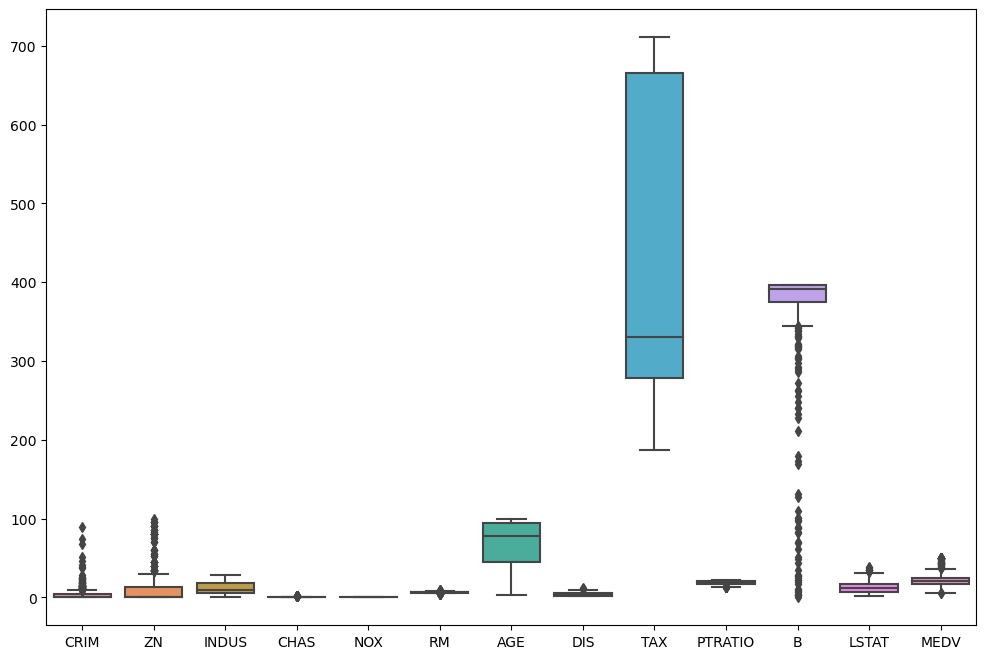

In [10]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(df_copy)


Las variables CRIM, ZN, RM,DIS,PRATIO, B, LSTAT tienen outliers.(Usaremos modelo RobustScaler)

Las variables INDUS, NOX, AGE, TAX no tienen outliers (Usaremos modelo MinMaxScaler).

La variable RAD ya la hemos transformado antes y CHAS tiene valores binarios por lo que ya no hay que estandarizar estas variables.

In [11]:
variables_con_outliers = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT','CHAS'] 
variables_sin_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

In [12]:
scaling = RobustScaler()

df_Robust = scaling.fit_transform(df_copy[variables_con_outliers])
df_Robust = pd.DataFrame(df_Robust, columns=variables_con_outliers)
df_Robust

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,CHAS
0,-0.069593,1.44,0.496612,0.285777,-1.339286,0.261902,-0.637681,0.0
1,-0.063755,0.00,0.287940,0.569789,-0.446429,0.261902,-0.221889,0.0
2,-0.063760,0.00,1.323171,0.569789,-0.446429,0.066675,-0.732634,0.0
3,-0.062347,0.00,1.069783,0.924391,-0.125000,0.153016,-0.841579,0.0
4,-0.052144,0.00,1.271680,0.924391,-0.125000,0.261902,-0.602699,0.0
...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.521003,-0.236007,0.696429,0.026382,-0.168916,0.0
502,-0.058759,0.00,-0.119919,-0.297887,0.696429,0.261902,-0.227886,0.0
503,-0.054450,0.00,1.039973,-0.336744,0.696429,0.261902,-0.571714,0.0
504,-0.040867,0.00,0.793360,-0.265053,0.696429,0.096414,-0.487756,0.0


In [13]:
scaling = MinMaxScaler()

df_MinMax = scaling.fit_transform(df_copy[variables_sin_outliers])
df_MinMax = pd.DataFrame(df_MinMax, columns=variables_sin_outliers)
df_MinMax

,INDUS,NOX,AGE,TAX
0,0.067815,0.314815,0.641607,0.208015
1,0.242302,0.172840,0.782698,0.104962
2,0.242302,0.172840,0.599382,0.104962
3,0.063050,0.150206,0.441813,0.066794
4,0.063050,0.150206,0.528321,0.066794
...,...,...,...,...
501,0.420455,0.386831,0.681771,0.164122
502,0.420455,0.386831,0.760041,0.164122
503,0.420455,0.386831,0.907312,0.164122
504,0.420455,0.386831,0.889804,0.164122


### concatenar todos los dataframes generados.

In [14]:
df_final = pd.concat([df_Robust.reset_index(drop=True),
                           df_MinMax.reset_index(drop=True),
                           df_dummies.reset_index(drop=True)],axis=1)
df_final

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,CHAS,INDUS,NOX,...,TAX,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.496612,0.285777,-1.339286,0.261902,-0.637681,0.0,0.067815,0.314815,...,0.208015,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.287940,0.569789,-0.446429,0.261902,-0.221889,0.0,0.242302,0.172840,...,0.104962,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,1.323171,0.569789,-0.446429,0.066675,-0.732634,0.0,0.242302,0.172840,...,0.104962,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,1.069783,0.924391,-0.125000,0.153016,-0.841579,0.0,0.063050,0.150206,...,0.066794,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,1.271680,0.924391,-0.125000,0.261902,-0.602699,0.0,0.063050,0.150206,...,0.066794,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.521003,-0.236007,0.696429,0.026382,-0.168916,0.0,0.420455,0.386831,...,0.164122,1,0,0,0,0,0,0,0,0
502,-0.058759,0.00,-0.119919,-0.297887,0.696429,0.261902,-0.227886,0.0,0.420455,0.386831,...,0.164122,1,0,0,0,0,0,0,0,0
503,-0.054450,0.00,1.039973,-0.336744,0.696429,0.261902,-0.571714,0.0,0.420455,0.386831,...,0.164122,1,0,0,0,0,0,0,0,0
504,-0.040867,0.00,0.793360,-0.265053,0.696429,0.096414,-0.487756,0.0,0.420455,0.386831,...,0.164122,1,0,0,0,0,0,0,0,0


la variable MEDV (valor medio de las viviendas ocupadas por sus propietarios en miles de dolares)será la variable target(y)
Seleccionamos las características (X) y la variable objetivo (y)

In [15]:
X = df_final
y = df['MEDV']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (404, 21)
y_train Shape: (404,)
X_test Shape: (102, 21)
y_test Shape: (102,)


In [16]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

model_svr = SVR(kernel='linear')
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

Text(0.5, 1.0, 'Máquinas de Vectores de Soporte (SVR)')

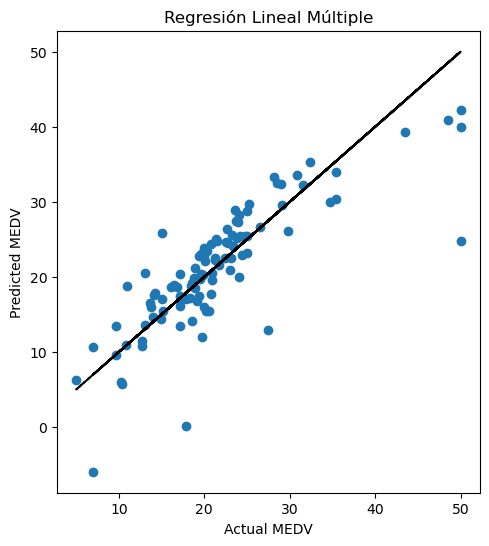

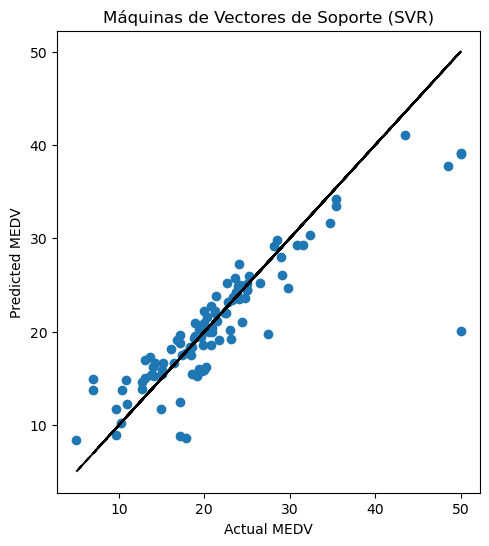

In [40]:
# Graficamos los resultados
#Lineal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.plot(y_test, y_test, '--k')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Regresión Lineal Múltiple')


#SVR
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svr)
plt.plot(y_test,y_test, '--k')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Máquinas de Vectores de Soporte (SVR)')



In [ ]:
els punts blaus s'apropen més a la línia de regressió, per tant, en principi, podríem dir que aquest model proporciona millors resultats en termes de precisió (tot i que continuen havent-hi alguns outliers).

 ## Exercici 2
Compara’ls en base al MSE i al R2.

Es común considerar tanto el MSE como el R2 para obtener una imagen completa del rendimiento del modelo. Un modelo con bajo MSE y alto R2 generalmente se considera bueno.

la comparación de modelos utilizando MSE y R2 te permite evaluar tanto la precisión numérica como la capacidad explicativa del modelo, lo que es esencial para seleccionar el modelo más adecuado.

Cuanto mayor sea el valor de R-cuadrado, mejor será el ajuste del modelo a los datos.0-1

In [48]:

# Evaluamos el modelo de Regresión Lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE para LR: {mse_lr}')

r2_lr = r2_score(y_test, y_pred_lr)
print(f'R^2 para LR: {r2_lr}')

# Evaluamos el modelo SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'MSE para SVR: {mse_svr}')

r2_svr = r2_score(y_test, y_pred_svr)
print(f'R^2 para SVR: {r2_svr}')


MSE para LR: 24.8184427384814
R^2 para LR: 0.6615687658684797
MSE para SVR: 19.415704268257446
R^2 para SVR: 0.735242020368557


En este caso el modelo que ajusta mejor es SVR. Su R2 es mayor y el MSE es menor respecto a los valores obtenidos en el modelo LR

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [20]:
model_lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [51]:
# Definimos la rejilla de parámetros a probar
param_grid = {'copy_X': [True,False], 
              'fit_intercept': [True,False],
              'positive': [True,False]}

# Buscamos los mejores parámetros 
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

#ajustar modelo a los datos
grid_search.fit(X_train, y_train)


# Obtenemos el mejor modelo después de la búsqueda
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Hacemos predicciones
y_pred_lr = best_lr.predict(X_test)


# Evaluamos el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'MSE para LR: {mse_lr}')
print(f'R^2 para LR: {r2_lr}')

MSE para LR: 24.8184427384814
R^2 para LR: 0.6615687658684797


la regresión lineal no tiene parámetros complejos como otros modelos más avanzados, por lo que ajustarlos puede tener un impacto limitado en comparación con modelos más complejos como las Máquinas de Vectores de Soporte o Bosques Aleatorios.

In [22]:
model_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
# Definimos la rejilla de parámetros a probar
param_grid = {'C': [0.1, 1, 10], 
              'epsilon': [0.01, 0.1, 0.2], 
              'kernel': ['linear', 'rbf']}

# Buscamos los mejores parámetros 
grid_search = GridSearchCV(model_svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo después de la búsqueda
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

# Hacemos predicciones
y_pred_svr = best_svr.predict(X_test)

# Evaluamos el modelo
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'MSE para SVR: {mse_svr}')
print(f'R^2 para SVR: {r2_svr}')

MSE para SVR: 19.415704268257446
R^2 para SVR: 0.735242020368557


## Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

LINEAL

In [25]:
cross_model_lr = LinearRegression(copy_X=True, fit_intercept=True, positive=False)

#validación cruzada
scores_lr_r2=cross_val_score(cross_model_lr, X, y, cv=5, scoring='r2')

#Resultados
print(f'R^2:{scores_lr_r2}' )

#Promedios
print(f'R^2 promedio:{scores_lr_r2.mean()}')


R^2:[ 0.61238312  0.74278118  0.5536421   0.08098992 -0.36475742]
R^2 promedio:0.32500778240812855


SVR

In [27]:
cross_model_svr = SVR(C= 100, epsilon = 1)

#validación cruzada
scores_svr_r2=cross_val_score(cross_model_svr, X, y, cv=5, scoring='r2')

#Resultados
print(f'R^2:{scores_svr_r2}' )

#Promedios
print(f'R^2 promedio:{scores_svr_r2.mean()}' )

R^2:[ 0.8108938   0.86146939  0.8417785   0.49632574 -0.72053761]
R^2 promedio:0.4579859655062862


Hay mucha variabilidad entre los folds.

el promedio R^2 esta mas cercano a 0 que a 1 (0.32 y 0.45). Los valores de R^2 cercanos a 1 indican un buen ajuste del modelo.
el model SVR se ajusta más que el modelo LR

## Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [59]:
X_train_sin_RM = X_train.drop('RM', axis=1)
X_test_sin_RM = X_test.drop('RM', axis=1)

#Regresión Lineal (LR)
model_lr = LinearRegression()
model_lr.fit(X_train_sin_RM, y_train)
y_pred_lr = model_lr.predict(X_test_sin_RM)

# Evaluamos el modelo de Regresión Lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE para LR: {mse_lr}')
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R^2 para LR: {r2_lr}')



#SVR
model_svr = SVR(kernel='linear')
model_svr.fit(X_train_sin_RM, y_train)
y_pred_svr = model_svr.predict(X_test_sin_RM)

# Evaluamos el modelo SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'MSE para SVR: {mse_svr}')

r2_svr = r2_score(y_test, y_pred_svr)
print(f'R^2 para SVR: {r2_svr}')

MSE para LR: 22.96547741919677
R^2 para LR: 0.6868363197765286
MSE para SVR: 23.17431891882935
R^2 para SVR: 0.6839884986137228


Valores obtenidos en el ejercicio 2:

- MSE para LR: 24.8184427384814
- R^2 para LR: 0.6615687658684797
- MSE para SVR: 19.415704268257446
- R^2 para SVR: 0.735242020368557

Los valores obtenidos en este ejercicio son peores y los modelos  se ajustan peor que antes ya que hemos eliminado una variable que tenia una alta correlación
